# Clustering Algorithms in pratice

Author: Dr. Stephan Hausberg, Winter semester 2024

1. Step: Generate Synthetic Data of customers including misssing data

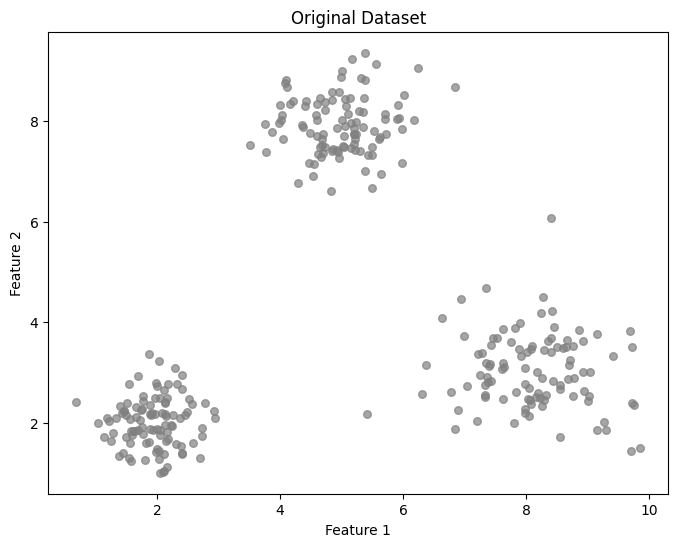

/Users/stephanhausberg/.pyenv/versions/3.10.0/envs/basic_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


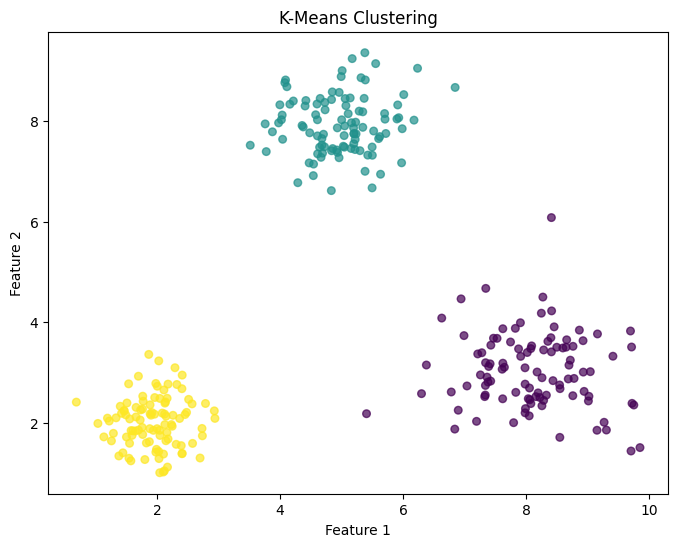

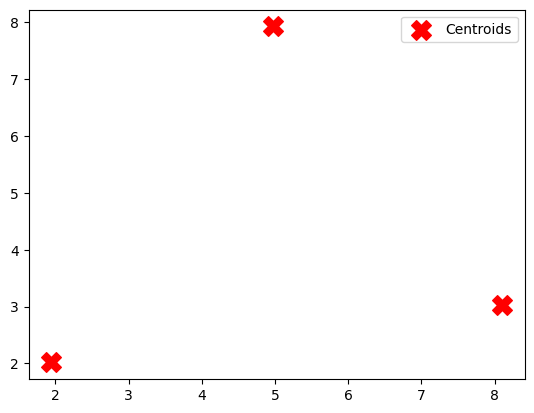

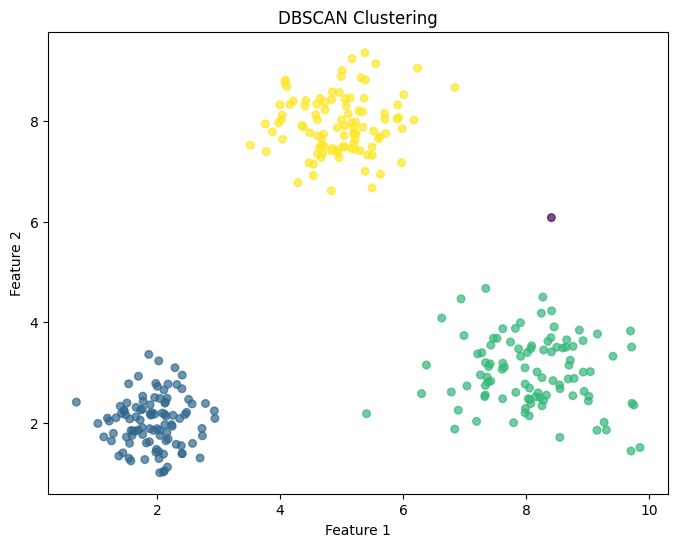

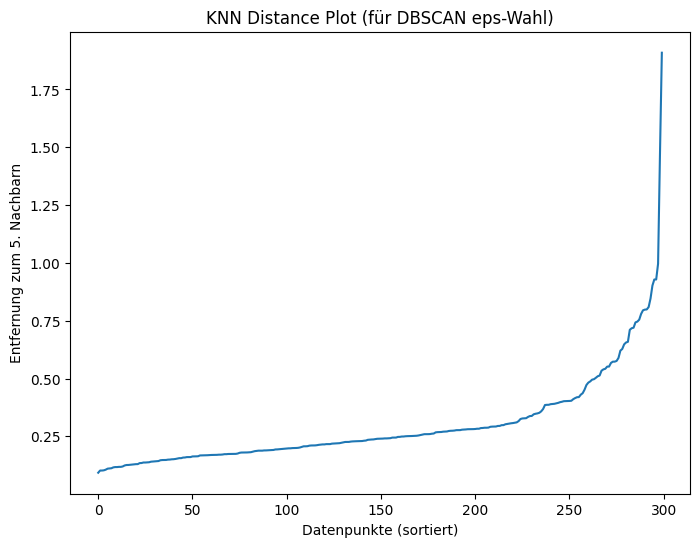

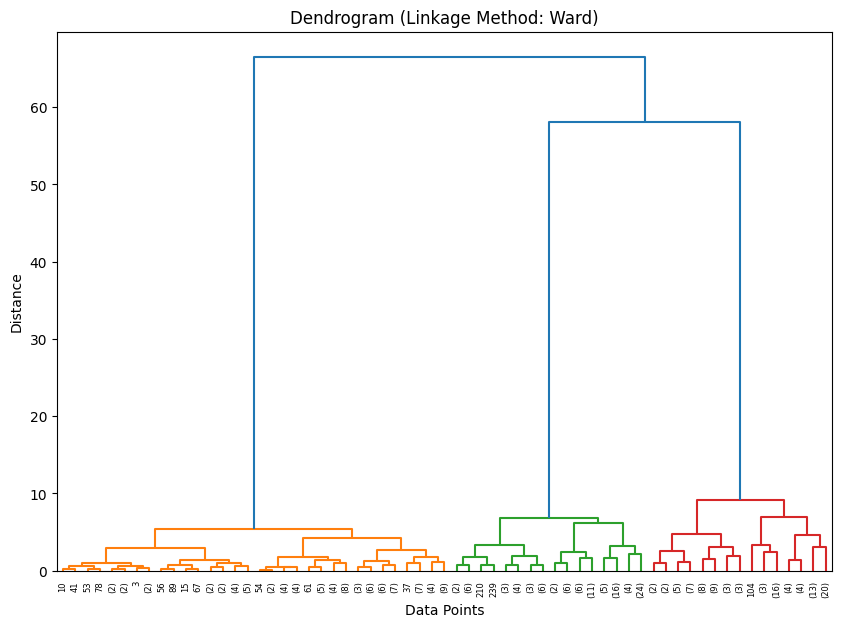

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# 1. Create 2D-data set with 3 Clusters
def generate_data():
    np.random.seed(42)  # For reproduction
    cluster_1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
    cluster_2 = np.random.normal(loc=[8, 3], scale=0.8, size=(100, 2))
    cluster_3 = np.random.normal(loc=[5, 8], scale=0.6, size=(100, 2))
    data = np.vstack((cluster_1, cluster_2, cluster_3))
    return data

# 2. Visualize dataset
def visualize_data(data, labels=None, title="Dataset"):
    plt.figure(figsize=(8, 6))
    if labels is None:
        plt.scatter(data[:, 0], data[:, 1], s=30, c='gray', alpha=0.7)
    else:
        plt.scatter(data[:, 0], data[:, 1], s=30, c=labels, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 3. Clustering with K-Means
def kmeans_clustering(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels, kmeans.cluster_centers_

# 4. Clustering with DBSCAN
def dbscan_clustering(data, eps=1.0, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

# 5. Analysis mit KNN (Visualising neighbourhood)
def knn_analysis(data, n_neighbors=5):
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(data)
    distances, indices = knn.kneighbors(data)
    return distances, indices

# 6. Create dendrogram and visualize
def plot_dendrogram(data, method='ward'):
    plt.figure(figsize=(10, 7))
    linked = linkage(data, method=method)
    dendrogram(linked, truncate_mode='level', p=5)  # Truncate for transparency
    plt.title(f"Dendrogram (Linkage Method: {method.capitalize()})")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# 6. Main program
if __name__ == "__main__":
    # Generate dataset
    data = generate_data()

    # Visualisize dataset
    visualize_data(data, title="Original Dataset")

    # K-Means Clustering
    kmeans_labels, kmeans_centers = kmeans_clustering(data)
    visualize_data(data, labels=kmeans_labels, title="K-Means Clustering")
    plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=200, c='red', label='Centroids', marker='X')
    plt.legend()
    plt.show()

    # DBSCAN Clustering
    dbscan_labels = dbscan_clustering(data)
    visualize_data(data, labels=dbscan_labels, title="DBSCAN Clustering")

    # KNN Analysis
    distances, _ = knn_analysis(data, n_neighbors=5)
    distances = np.sort(distances[:, -1])  # Sortiere die größten Abstände
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title("KNN Distance Plot (für DBSCAN eps-Wahl)")
    plt.xlabel("Datenpunkte (sortiert)")
    plt.ylabel("Entfernung zum 5. Nachbarn")
    plt.show()

    # Plotting Dendrogram
    plot_dendrogram(data, method='ward')

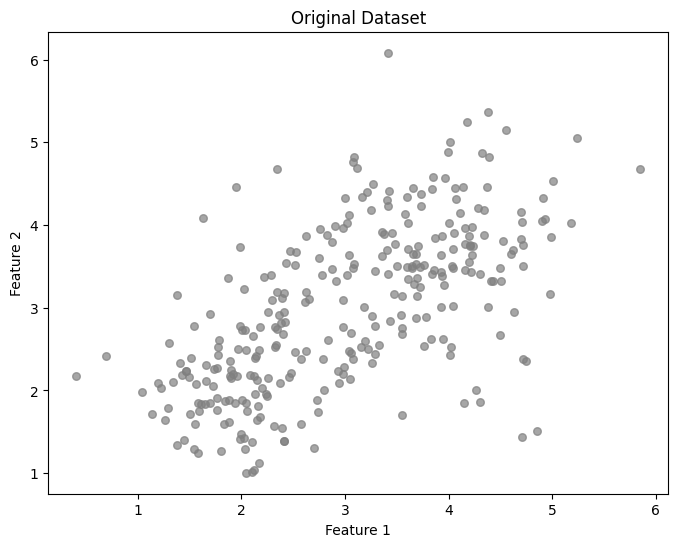

/Users/stephanhausberg/.pyenv/versions/3.10.0/envs/basic_env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


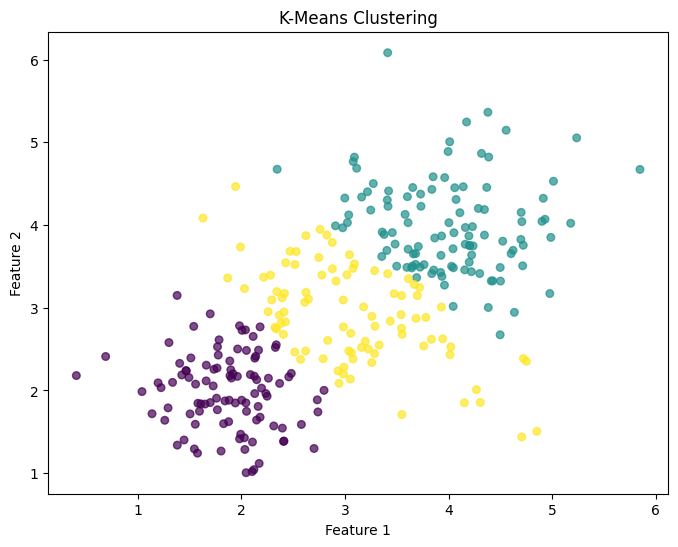

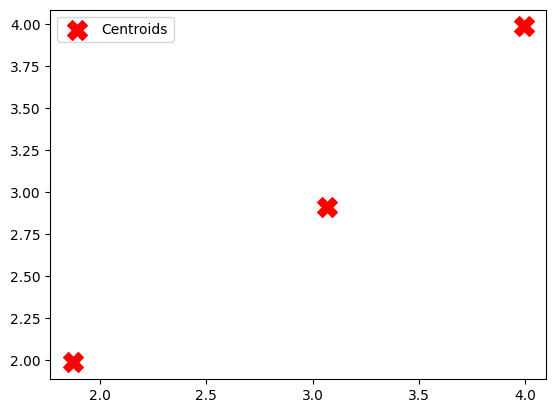

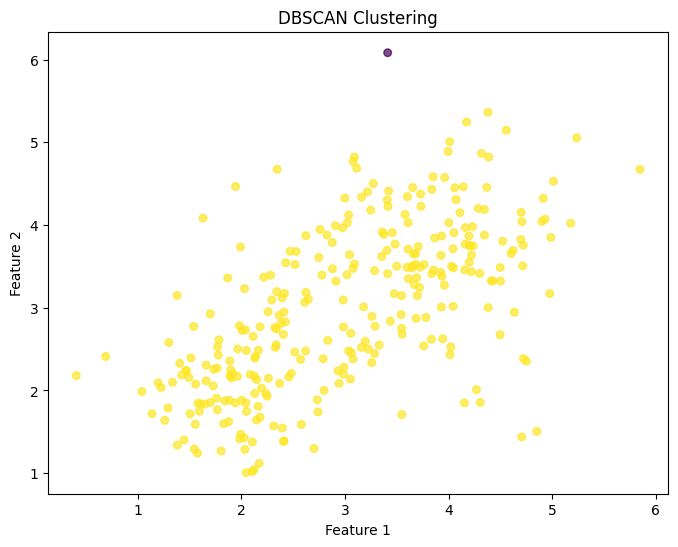

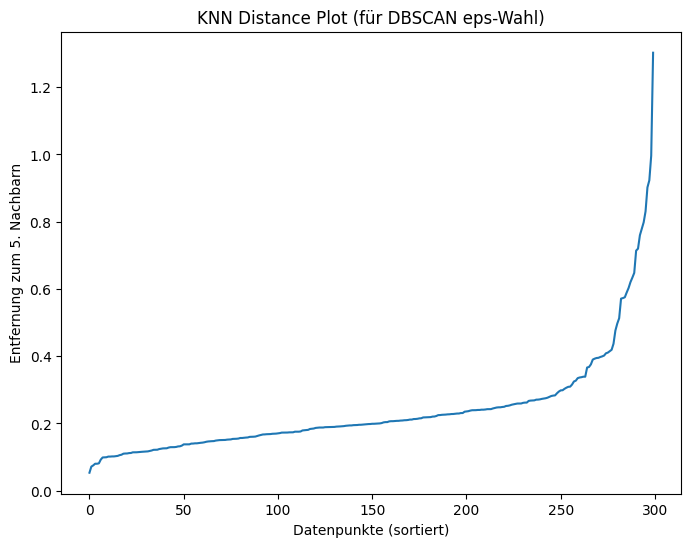

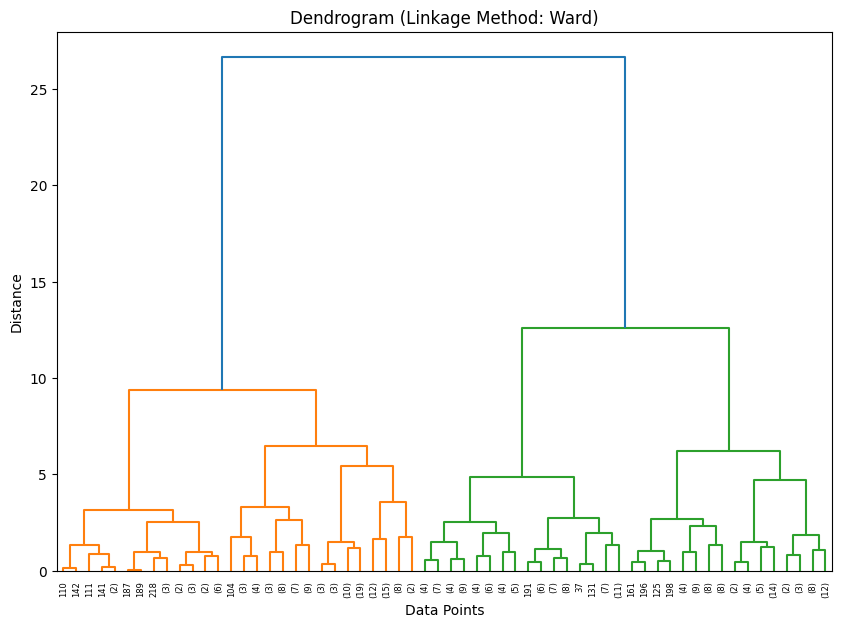

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# 1. Create 2D-data set with 3 Clusters
def generate_data():
    np.random.seed(42)  # For reproduction
    cluster_1 = np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2))
    cluster_2 = np.random.normal(loc=[3, 3], scale=0.8, size=(100, 2))
    cluster_3 = np.random.normal(loc=[4, 4], scale=0.6, size=(100, 2))
    data = np.vstack((cluster_1, cluster_2, cluster_3))
    return data

# 2. Visualize dataset
def visualize_data(data, labels=None, title="Dataset"):
    plt.figure(figsize=(8, 6))
    if labels is None:
        plt.scatter(data[:, 0], data[:, 1], s=30, c='gray', alpha=0.7)
    else:
        plt.scatter(data[:, 0], data[:, 1], s=30, c=labels, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# 3. Clustering with K-Means
def kmeans_clustering(data, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels, kmeans.cluster_centers_

# 4. Clustering with DBSCAN
def dbscan_clustering(data, eps=1.0, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(data)
    return labels

# 5. Analysis mit KNN (Visualising neighbourhood)
def knn_analysis(data, n_neighbors=5):
    knn = NearestNeighbors(n_neighbors=n_neighbors)
    knn.fit(data)
    distances, indices = knn.kneighbors(data)
    return distances, indices

# 6. Create dendrogram and visualize
def plot_dendrogram(data, method='ward'):
    plt.figure(figsize=(10, 7))
    linked = linkage(data, method=method)
    dendrogram(linked, truncate_mode='level', p=5)  # Truncate for transparency
    plt.title(f"Dendrogram (Linkage Method: {method.capitalize()})")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

# 6. Main program
if __name__ == "__main__":
    # Generate dataset
    data = generate_data()

    # Visualisize dataset
    visualize_data(data, title="Original Dataset")

    # K-Means Clustering
    kmeans_labels, kmeans_centers = kmeans_clustering(data)
    visualize_data(data, labels=kmeans_labels, title="K-Means Clustering")
    plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], s=200, c='red', label='Centroids', marker='X')
    plt.legend()
    plt.show()

    # DBSCAN Clustering
    dbscan_labels = dbscan_clustering(data)
    visualize_data(data, labels=dbscan_labels, title="DBSCAN Clustering")

    # KNN Analysis
    distances, _ = knn_analysis(data, n_neighbors=5)
    distances = np.sort(distances[:, -1])  # Sortiere die größten Abstände
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title("KNN Distance Plot (für DBSCAN eps-Wahl)")
    plt.xlabel("Datenpunkte (sortiert)")
    plt.ylabel("Entfernung zum 5. Nachbarn")
    plt.show()

    # Plotting Dendrogram
    plot_dendrogram(data, method='ward')
